In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import model_from_json

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [42]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [43]:
train.shape

(42000, 785)

In [44]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [46]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [47]:
y_train = train[["label"]]
X_train = train.drop("label", axis=1)

In [48]:
X_train = X_train/ 255
y_train = y_train/ 255

In [49]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
encoder = OneHotEncoder(handle_unknown="ignore")

In [51]:
y_train = pd.DataFrame(encoder.fit_transform(train[['label']]).toarray())

In [52]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
nn = models.Sequential()
nn.add(layers.Dense(256, activation="sigmoid", input_shape=(784, )))
nn.add(layers.Dense(10, activation="sigmoid"))

In [54]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
nn.compile(loss='categorical_crossentropy', optimizer='rmsprop' ,
           metrics=['accuracy'])

In [56]:
history = nn.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1182/1182 [==============================] - 6s 4ms/step - loss: 0.4086 - accuracy: 0.8888 - val_loss: 0.2587 - val_accuracy: 0.9260
Epoch 2/30
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2233 - accuracy: 0.9342 - val_loss: 0.1951 - val_accuracy: 0.9417
Epoch 3/30
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1709 - accuracy: 0.9499 - val_loss: 0.1668 - val_accuracy: 0.9486
Epoch 4/30
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1355 - accuracy: 0.9603 - val_loss: 0.1423 - val_accuracy: 0.9560
Epoch 5/30
1182/1182 [==============================] - 5s 5ms/step - loss: 0.1111 - accuracy: 0.9682 - val_loss: 0.1266 - val_accuracy: 0.9600
Epoch 6/30
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0934 - accuracy: 0.9727 - val_loss: 0.1156 - val_accuracy: 0.9655
Epoch 7/30
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0790 - accuracy: 0.9775 - val_loss: 0.1102 - val_accuracy:

In [58]:
history.history['accuracy']

[0.8887830972671509,
 0.9342328310012817,
 0.9498677253723145,
 0.9602910280227661,
 0.9682275056838989,
 0.9726719856262207,
 0.9775132536888123,
 0.9806613922119141,
 0.9827777743339539,
 0.9860053062438965,
 0.987671971321106,
 0.9897618889808655,
 0.9904761910438538,
 0.9920634627342224,
 0.9931216835975647,
 0.9945502877235413,
 0.9955819845199585,
 0.9956084489822388,
 0.9967195987701416,
 0.9971163868904114,
 0.9977512955665588,
 0.9982010722160339,
 0.9983333349227905,
 0.9986507892608643,
 0.9987565875053406,
 0.998968243598938,
 0.9992063641548157,
 0.9992592334747314,
 0.9994708895683289,
 0.9995502829551697]

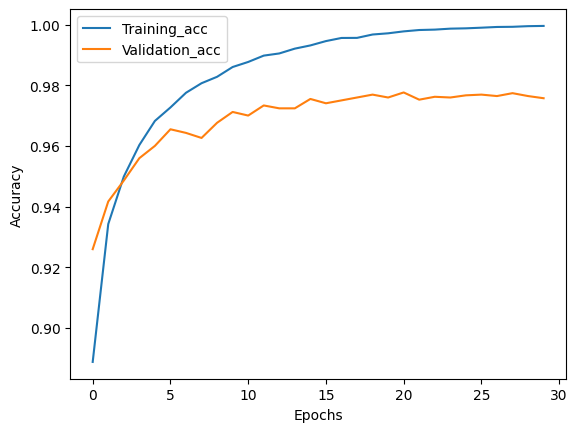

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()

In [60]:
max(history.history['val_accuracy'])

0.9776190519332886

In [57]:
prediction = nn.predict(x = test)

875/875 [==============================] - 2s 2ms/step


In [67]:
rounded_prediction = np.argmax(prediction, axis=1)
print(rounded_prediction)

[2 0 9 ... 3 9 2]


In [66]:
rounded_prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)